In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
compute_distance <- function(x, center){
    dist <- sum((x - center)^2)
    dist
}

In [3]:
argmin <- function(x){
    ind <- which.min(x)
    ind
}

In [16]:

fit <- function(x, k, n_init=10, max_iter=100){  
    
    # initialize inertia to infinity
    inertia <- 1/0    
    count <- 0
    
    while (count <= n_init){
         # initialize k centers
        centers <- sample_n(x, k)

        # Get distance from samples to all centers
        n_rows <- dim(x)[1]
        n_cols <- k
        distances <- data.frame(matrix(nrow=n_rows, ncol=n_cols))

        # Iterate over max_iter
        for (i in seq(max_iter)){
            # Compute distance matrix with current centers
            for (c in seq(k)){
                col <- names(distances)[c]
                center <- centers[c, ]
                distances[col] <- apply(x, 1, FUN = compute_distance, center = center)

            }

            labels <- apply(distances, 1, argmin)

            # Move the centers to mean of the clusters
            prev_centers <- centers
            for (c in seq(k)){
                centers[c, ] <- apply(x[labels==c,], 2, mean)

            }
            # Update the inertia
            updated_inertia <- sum(apply(distances, 1, min))

            # Check if the centers are moving
            diff_centers <- abs(sum(prev_centers - centers))

            if (diff_centers < 1e-6){
#                 print(paste("Converged in", i, "iterations"))
                break
            }

        }   
        count <- count + 1 
        
    }      
  
    # Check if current initialization is better
    if (updated_inertia < inertia){
        inertia = updated_inertia
        centers_final = centers
        labels_final = labels        
    }   
   
    # Return labels and centers
    list("labels" = labels_final, "centers" = centers_final)
}

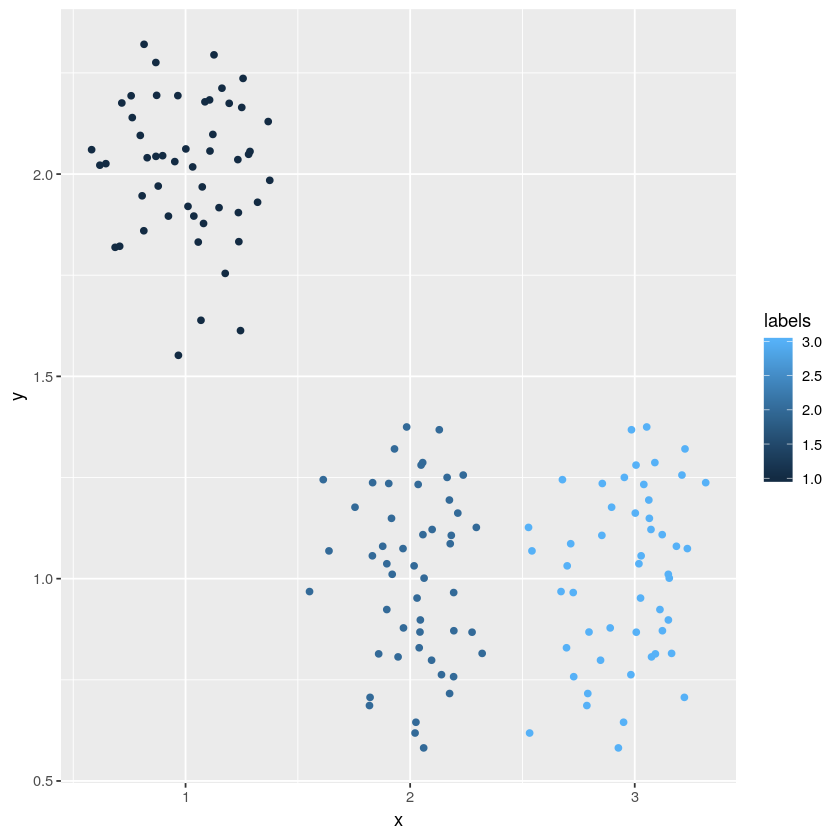

In [17]:
x1 <- rnorm(50, 1, 0.2)
x2 <- rnorm(50, 2, 0.2)
x3 <- rnorm(50, 3, 0.2)
x <- c(x1, x2, x3)
y <- c(x2, x1, x1)

df <- data.frame(x, y)
results <- fit(df, 3, n_init=2, max_iter=10)

df_results <- df
df_results$labels <- results$labels

ggplot(df_results, aes(x=x, y=y, color=labels)) +
    geom_point()

### elbow function

In [66]:
library(tidyverse)
library(ArgumentCheck)

ERROR: Error in library(ArgumentCheck): there is no package called ‘ArgumentCheck’


In [20]:
source("R/fit.R")

In [64]:
centers <- seq(2)
x1 <- rnorm(50, 1, 0.2)
x2 <- rnorm(50, 2, 0.2)
x3 <- rnorm(50, 3, 0.2)
x <- c(x1, x2, x3)
y <- c(x2, x1, x1)

df <- data.frame(x, y)

In [32]:
compute_distance <- function(x, center){
    dist <- sum((x - center)^2)
    dist
}

In [92]:
elbow <- function(x, centers){
    
    # Check if type of data is valid
    if ((!is_tibble(x)) & (!is.data.frame(x))) {
    stop("'Data shoud be a tibble or data.frame")
    }
    
    # Check if type of centers is valid
    if (!is.vector(centers)) {
    stop("'Centers shoud be a vector")
    }
    
    # Check if the values in the number of centers are valid
    if ((min(centers) < 1) | (max(centers) > dim(x)[1])) {
                stop("Invalid values in list of numbers of clusters, 
                        Number of clusters should be between 1 and number of samples")        
    }
    
    if (!all(centers == floor(centers))){
        stop("Number of centers should be integer") 
        
    }


    inertia <- c()
    for (k in centers){
        # Fit kmeans for nuber of centers k
        km <- fit(df, k, n_init = 1, max_iter = 10)
        labels <- km$labels
        centroids <- km$centers

        # Calucate the inertia
        inertia_m <- 0
        for (m in seq(k)){
            cluster_m <- df[labels==m, ]
            center <- centroids[m, ]
            inertia_m <- inertia_m + sum(apply(cluster_m, 1, 
                                               FUN = compute_distance, 
                                               center = center))

        inertia[k] <- inertia_m

        }

    }
    
    # Plot the results
    results <- data.frame("k" = centers, "inertia" = inertia)

    p <- ggplot(results, aes(x = k, y = inertia)) +
        geom_line() +
        scale_x_continuous(breaks = seq(length(centers))) +
        xlab("k") +
        ylab("Inertia") +
        ggtitle("k vs Inertia Using Elbow Method")
    
    list("inertia" = inertia, "plot" = p)
    
}

In [95]:
centers <- c(1.1, 2.0)
elbow(df, centers)

ERROR: Error in elbow(df, centers): Number of centers should be of type int


In [89]:
dim(df)[0]b

integer(0)

$inertia
[1] 14.4118853  3.4138554  0.7324320  0.5256127  0.4666093

$plot


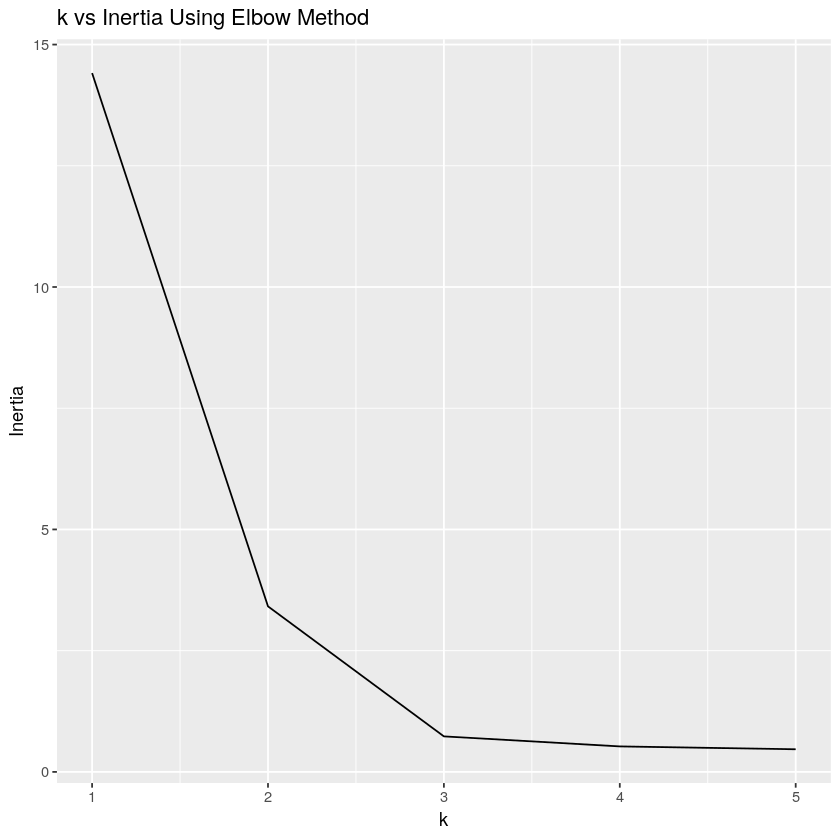

In [98]:
centers <- seq(2)
x1 <- rnorm(5, 1, 0.2)
x2 <- rnorm(5, 2, 0.2)
x3 <- rnorm(5, 3, 0.2)
x <- c(x1, x2, x3)
y <- c(x2, x1, x1)

df <- data.frame(x, y)

centers <- c(1, 2, 3, 4, 5)
elbow(df, centers)

In [99]:
test_that("Elbow unction to find best k", {

    x1 <- rnorm(5, 1, 0.2)
    x2 <- rnorm(5, 2, 0.2)
    x3 <- rnorm(5, 3, 0.2)
    x <- c(x1, x2, x3)
    y <- c(x2, x1, x1)

    df <- data.frame(x, y)

    centers <- c(1, 2, 3, 4, 5)

    expect_identical(length(elbow(df, centers)$labels), length(centers))
})

ERROR: Error in test_that("Elbow unction to find best k", {: could not find function "test_that"


In [127]:
library(testthat)

x1 <- rnorm(5, 1, 0.2)
x2 <- rnorm(5, 2, 0.2)
x3 <- rnorm(5, 3, 0.2)
x <- c(x1, x2, x3)
y <- c(x2, x1, x1)

df <- data.frame(x, y)

centers <- c(1, 2, 3, 4, 5)

#tests
test_that("Function should return a list with 2 objects", {
  expect_equal(length(elbow(df, centers)), 2)
})

test_that("Length of inertia and number of centers should match", {
  expect_equal(length(elbow(df, centers)$inertia), length(centers))
})

test_that("Plot object returned should be of type list", {
  expect_equal(typeof(elbow(df, centers)$plot), "list")
})

test_that("Second object in the list should be a ggplot object", {
  expect_equal(class(elbow(df, centers)$plot)[2], "ggplot")
})

In [129]:
length(elbow(df, centers))

[1] 2

In [107]:
length(centers)

[1] 5